In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding='ISO-8859-1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [7]:
# Get numeric columns
df_num = df.loc[:, df.dtypes == np.float64]
df_num.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
0,-102.02210,22.20887,229.990,940.0,NaN
1,-102.20075,21.99958,231.990,608.0,NaN
2,-102.28801,22.36685,204.920,532.0,NaN
3,-102.29449,22.18435,327.000,686.0,NaN
4,-110.24480,23.45138,309.885,1841.0,NaN


In [9]:
df_num.shape

(1068, 5)

In [8]:
df_num.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,235.633759,1138.953013,NaN
std,6.703263,3.887670,116.874291,1245.563674,NaN
min,-116.664250,14.561150,26.640000,50.400000,NaN
25%,-105.388865,20.212055,164.000000,501.750000,NaN
50%,-102.174180,22.617190,215.527500,815.000000,NaN
75%,-98.974716,25.510285,292.710000,1322.750000,NaN
max,-86.864120,32.677713,1650.000000,18577.000000,NaN


# Usando kmeans para determinar el numero de agrupamientos

In [11]:
latlong=df_num[["LATITUD","LONGITUD"]]

<AxesSubplot:xlabel='LATITUD', ylabel='LONGITUD'>

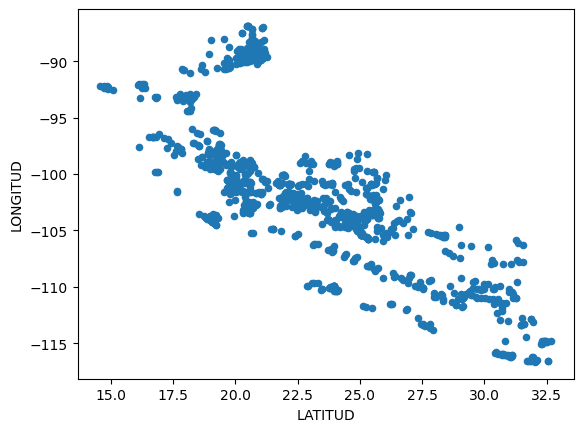

In [12]:
latlong.plot.scatter( "LATITUD","LONGITUD")

In [13]:
from sklearn.cluster import KMeans

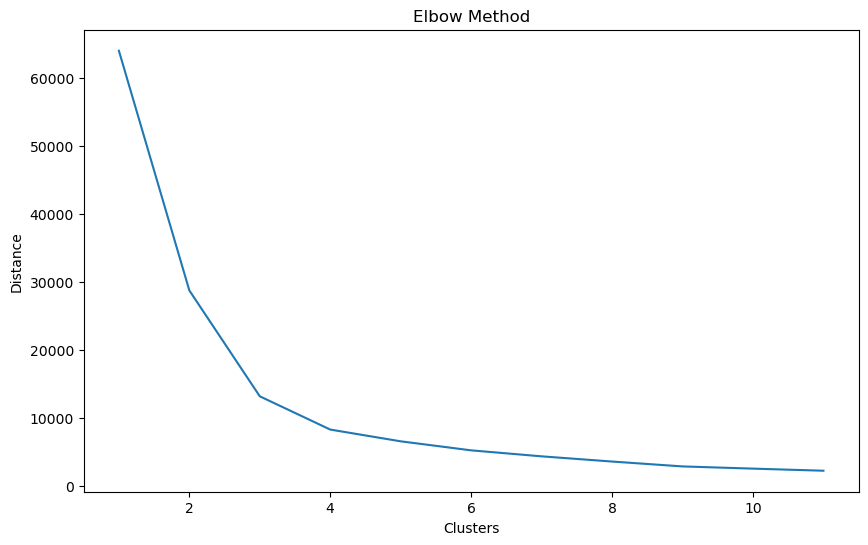

In [14]:
K = range(1,12)
distance=[]

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(latlong)
    distance.append(kmeans.inertia_) 

plt.figure(figsize=(10, 6))
plt.plot(K, distance)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()

# NÚMERO OPTIMO ES 3 CLUSTERS

In [15]:
# Obtener la ubicacion optima de los almacenes
kmeans = KMeans(n_clusters=3, random_state=1)
kmean_p = kmeans.fit_predict(latlong) # Nos dice a que cluster pertenece cada ubicacion
countTotal = np.bincount(kmean_p)
print(countTotal) # Total de tiendas que va a surtir cada almacen
print(kmeans.cluster_centers_) # Latitud y longitud de los almacenes

[650 180 238]
[[  22.25422556 -101.7221275 ]
 [  19.47336214  -90.7284703 ]
 [  28.43820216 -110.79448776]]


In [17]:
# Obtener las ciudades de cada almacen
from geopy.geocoders import Nominatim
centers = kmeans.cluster_centers_
geolocator = Nominatim(user_agent="kmeans_app")
locations = []
for i in range(len(centers)):
  location = geolocator.reverse(str(centers[i][0]) + "," + str(centers[i][1]))
  locations.append(location.address)
  print(f'Location {i+1}: {location.address}')

Location 1: Pedregoso, Pinos, Zacatecas, México
Location 2: Ciudad del Sol, Champotón, Campeche, México
Location 3: Guaymas, Sonora, México
